In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Separando informações de treino e de teste

In [5]:
X = df.drop(['id', 'Class'], axis=1, errors='ignore')
y = df['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(
    f"""
        Tamanho de treino e teste:

        Treino: {X_train.shape}
        Teste: {X_test.shape}
    """
)


        Tamanho de treino e teste:

        Treino: (454904, 29)
        Teste: (113726, 29)
    


Normalizando a escala das informações

In [8]:
# Esse código aplica a normaização da escala fazendo com que cada variavel fique em torno do 0

# Isso é necessario quando os valores de uma das colunas são muito superiores a de outra, por exemplo:
# Coluna	Faixa de valores
# Idade	20 a 60
# Salário	2000 a 8000

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
print(pd.Series(y_train).value_counts(normalize=True))

Class
0    0.500248
1    0.499752
Name: proportion, dtype: float64


Treinamento do modelo

In [10]:
# O treinamento desse modelo é com base em floresta aleatoria

# Explicacao parametros:
# n_estimatora é o numero maximo de arvores
# max_depth e a profundidade maxima
# min_smples_split define se ainda podem ser feitas perguntas no nó
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
)

In [11]:
# Validação cruzada
# Aqui o modelo é treinado com 5 partes diferentes da parte de treino e é testado com 5 partes diferentes da parte de teste, depois faz a média dos resultados
# que resulta no desempenho do modelo

cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1')
print("\nCross-validation F1 scores:", cv_scores)
print("Average F1 score:", np.mean(cv_scores))


Cross-validation F1 scores: [0.98470321 0.98644528 0.98474499 0.98431399 0.98386053]
Average F1 score: 0.9848135979171477


In [12]:
# Treinamento do modelo

rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [13]:
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



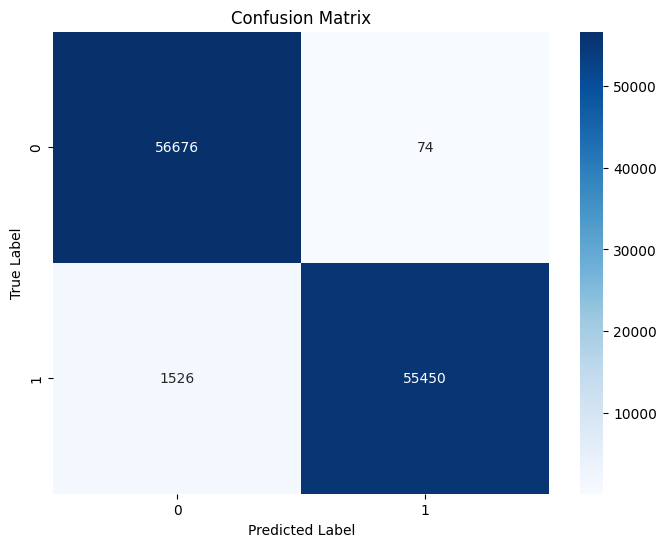

In [14]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [15]:
import joblib

joblib.dump(rf_model, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']